# Financial and Economic Data Applications

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [2]:
%matplotlib inline

In [3]:
%pwd

'C:\\My files\\TRAINING\\Course\\Python\\pydata-book-master'

## Data munging topics

### Time series and cross-section alignment

In [4]:
close_px = pd.read_csv('ch11/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('ch11/volume.csv', parse_dates=True, index_col=0)
prices = close_px.ix['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.ix['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [ ]:
prices

In [ ]:
volume

In [ ]:
prices * volume

In [ ]:
vwap = (prices * volume).sum() / volume.sum()

In [ ]:
vwap

In [ ]:
vwap.dropna()

In [ ]:
prices.align(volume, join='inner')

In [ ]:
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

In [ ]:
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

### Operations with time series of different frequencies

In [13]:
ts1 = Series(np.random.randn(3),
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1

2012-06-13    0.374243
2012-06-20   -0.862031
2012-06-27    0.193486
Freq: W-WED, dtype: float64

In [14]:
ts1.resample('B')

DatetimeIndexResampler [freq=<BusinessDay>, axis=0, closed=left, label=left, convention=start, base=0]

In [15]:
ts1.resample('B', fill_method='ffill')

c:\users\chu060\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


2012-06-13    0.374243
2012-06-14    0.374243
2012-06-15    0.374243
2012-06-18    0.374243
2012-06-19    0.374243
2012-06-20   -0.862031
2012-06-21   -0.862031
2012-06-22   -0.862031
2012-06-25   -0.862031
2012-06-26   -0.862031
2012-06-27    0.193486
Freq: B, dtype: float64

In [16]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = Series(np.random.randn(6), index=dates)
ts2

2012-06-12    1.683905
2012-06-17    1.641518
2012-06-18   -0.587771
2012-06-21   -0.902707
2012-06-22   -1.358595
2012-06-29   -0.605899
dtype: float64

In [17]:
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.374243
2012-06-18    0.374243
2012-06-21   -0.862031
2012-06-22   -0.862031
2012-06-29    0.193486
dtype: float64

In [ ]:
ts2 + ts1.reindex(ts2.index, method='ffill')

#### Using periods instead of timestamps

In [6]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [7]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [8]:
infl_q = infl.asfreq('Q-SEP', how='end')

In [9]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [10]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### Time of day and "as of" data selection

In [18]:
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
                        ...  
2012-06-06 15:54:00    1554.0
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
dtype: float64

In [ ]:
from datetime import time
ts[time(10, 0)]

In [ ]:
ts.at_time(time(10, 0))

In [ ]:
ts.between_time(time(10, 0), time(10, 1))

In [ ]:
np.random.seed(12346)

In [21]:
# Set most of the time series randomly to NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00     NaN
2012-06-01 09:51:00    21.0
2012-06-01 09:52:00     NaN
2012-06-01 09:53:00     NaN
2012-06-01 09:54:00    24.0
2012-06-01 09:55:00     NaN
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00    30.0
dtype: float64

In [ ]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

### Splicing together data sources

In [22]:
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [23]:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [24]:
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [25]:
spliced.update(data2, overwrite=False)

In [26]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [ ]:
cp_spliced = spliced.copy()
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

### Return indexes and cumulative returns

In [28]:
import pandas as web
price = web.get_data_yahoo('AAPL', '2011-01-01')['Adj Close']
price[-5:]

AttributeError: module 'pandas' has no attribute 'get_data_yahoo'

In [ ]:
price['2011-10-03'] / price['2011-3-01'] - 1

In [ ]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1  # Set first value to 1
ret_index

In [ ]:
m_returns = ret_index.resample('BM', how='last').pct_change()
m_returns['2012']

In [ ]:
m_rets = (1 + returns).resample('M', how='prod', kind='period') - 1
m_rets['2012']

## Group transforms and analysis

In [29]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10
np.random.seed(12345)

In [5]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [41]:
M = 500
df = DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
                'Value' : np.random.randn(M) / 200 + 0.08,
                'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                index=tickers[:M])
df

,Momentum,ShortInterest,Value
MYNBI,0.041229,-0.020805,0.079125
QPMZJ,0.031481,-0.016888,0.082770
PLSGQ,0.033004,-0.022567,0.078380
EJEYD,0.032449,-0.024992,0.066342
TZIRW,0.029772,-0.018950,0.084676
ZTEJD,0.029023,-0.019308,0.083652
XCVKP,0.027749,-0.008760,0.070925
RDLNK,0.028638,-0.019912,0.080291
TUGRP,0.030130,-0.024234,0.084503
OQIBZ,0.024159,-0.022115,0.079864


In [38]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')
industries

MYNBI    FINANCIAL
QPMZJ    FINANCIAL
PLSGQ    FINANCIAL
EJEYD    FINANCIAL
TZIRW    FINANCIAL
ZTEJD         TECH
XCVKP    FINANCIAL
RDLNK    FINANCIAL
TUGRP         TECH
OQIBZ         TECH
RACXM    FINANCIAL
WZVUA    FINANCIAL
TPKHX    FINANCIAL
KWCGS    FINANCIAL
HHZEZ    FINANCIAL
ROCCK         TECH
QPDJR    FINANCIAL
JWDRK    FINANCIAL
RGZTR    FINANCIAL
SJOCT    FINANCIAL
ZMKSH         TECH
JFGFB         TECH
TVIPC         TECH
CVYEE    FINANCIAL
BCWRV    FINANCIAL
MWQIQ    FINANCIAL
ZHGVS         TECH
NSIOP    FINANCIAL
VUWZL         TECH
CKTDP    FINANCIAL
SUKGH         TECH
AXIDW         TECH
HLZFK    FINANCIAL
NBDZE    FINANCIAL
WHBSU    FINANCIAL
RTVCA    FINANCIAL
DUGTS    FINANCIAL
DMCLD         TECH
BTAGF         TECH
WDPGX         TECH
ZBVAR         TECH
NTDIC         TECH
HCUJL    FINANCIAL
NFBQO         TECH
BTDWM    FINANCIAL
GILXP         TECH
SFWVG         TECH
YBZVF         TECH
FKQID    FINANCIAL
TOVFA    FINANCIAL
           ...    
XUZXX    FINANCIAL
UMYTA       

In [42]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.030155,-0.020458,0.080006
TECH,0.029243,-0.019947,0.079503


In [ ]:
by_industry.describe()

In [ ]:
# Within-Industry Standardize
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

In [ ]:
df_stand.groupby(industries).agg(['mean', 'std'])

In [ ]:
# Within-industry rank descending
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

In [ ]:
# Industry rank and standardize
by_industry.apply(lambda x: zscore(x.rank()))

### Group factor exposures

In [14]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

#print(len(tickers))

ticker_subset = tickers.take(np.random.permutation(N)[:1000])
#print(len(ticker_subset))

# Weighted sum of factors plus noise
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
              index=ticker_subset)
print(port)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)
print(factors)

KHQOB    0.738123
MRHOG   -0.455999
GOKAY    0.734997
PZXPR   -0.364489
INSQR    0.405306
KPNFS    0.419673
           ...   
YIRFR    0.330463
GBZMO    0.173061
LXPKD   -0.548340
FPAUI    0.985371
RFHHN    0.605032
GOWVM    0.350921
dtype: float64
             f1        f2        f3
KHQOB  0.413512  0.555164  0.957666
MRHOG  0.059176  0.717124  0.484170
GOKAY  0.139793  0.527265  0.952451
PZXPR  0.145375  0.590434  0.419923
INSQR  0.340387  0.516439  0.047980
KPNFS  0.460844  0.358106  0.707136
...         ...       ...       ...
YIRFR  0.214123  0.412756  0.745415
GBZMO  0.735286  0.655926  0.488886
LXPKD  0.117342  0.742152  0.794844
FPAUI  0.618262  0.169578  0.440537
RFHHN  0.433308  0.321356  0.862739
GOWVM  0.325283  0.274675  0.139075

[1000 rows x 3 columns]


In [15]:
factors.corrwith(port)

f1    0.388308
f2   -0.681925
f3    0.181952
dtype: float64

In [ ]:
pd.ols(y=port, x=factors).beta

In [ ]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [ ]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

### Decile and quartile analysis

In [24]:
import pandas_datareader.data as web
data = web.2('SPY', '2006-01-01')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2773 entries, 2006-01-03 to 2017-01-06
Data columns (total 6 columns):
Open         2773 non-null float64
High         2773 non-null float64
Low          2773 non-null float64
Close        2773 non-null float64
Volume       2773 non-null int64
Adj Close    2773 non-null float64
dtypes: float64(5), int64(1)
memory usage: 151.6 KB


In [44]:
px = data['Adj Close']
returns = px.pct_change()
print(returns)

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = rets.rolling(lookback, min_periods=lookback - 5).sum()
    return signal.shift(lag)

Date
2006-01-03         NaN
2006-01-04    0.004736
2006-01-05    0.000628
2006-01-06    0.008322
2006-01-09    0.002569
2006-01-10    0.001009
                ...   
2016-12-29   -0.000223
2016-12-30   -0.003655
2017-01-03    0.007650
2017-01-04    0.005949
2017-01-05   -0.000794
2017-01-06    0.003578
Name: Adj Close, dtype: float64


In [52]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').resample('B').ffill()
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
                ...   
2016-12-29    0.055840
2016-12-30    0.057257
2017-01-03    0.040814
2017-01-04    0.041187
2017-01-05    0.036935
2017-01-06    0.047060
Name: Adj Close, dtype: float64


c:\users\chu060\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  app.launch_new_instance()


Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
                ...   
2016-08-11    0.000439
2016-08-12   -0.000082
2016-08-15    0.000234
2016-08-16   -0.000419
2016-08-17    0.000153
2016-08-18    0.000182
Name: Adj Close, dtype: float64

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
                ...   
2016-08-11    1.090552
2016-08-12    1.090462
2016-08-15    1.090718
2016-08-16    1.090261
2016-08-17    1.090427
2016-08-18    1.090626
Name: Adj Close, dtype: float64

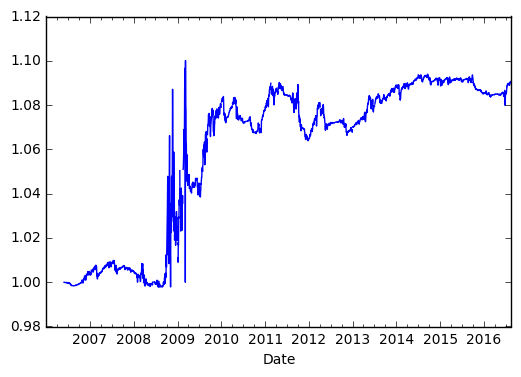

In [53]:
to_index(trade_rets).plot()
to_index(trade_rets)

In [ ]:
vol = pd.rolling_std(returns, 250, min_periods=200) * np.sqrt(250)

def sharpe(rets, ann=250):
    return rets.mean() / rets.std()  * np.sqrt(ann)

In [ ]:
cats = pd.qcut(vol, 4)
print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

In [ ]:
trade_rets.groupby(cats).agg(sharpe)

## More example applications

### Signal frontier analysis

In [ ]:
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = DataFrame({n: get_px(n, None, None) for n in names})

In [ ]:
#px = pd.read_csv('ch11/stock_px.csv')

In [ ]:
plt.close('all')

In [ ]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()

In [ ]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [ ]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [ ]:
strat_sr(px, 70, 30)

In [ ]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

In [ ]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

In [ ]:
heatmap(ddf)

### Future contract rolling

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
import pandas.io.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px

In [ ]:
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
          'ESZ2': datetime(2012, 12, 21)}
expiry = Series(expiry).order()

In [ ]:
expiry

In [ ]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [ ]:
prices.tail()

In [ ]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [ ]:
weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.ix['2012-09-12':'2012-09-21']

In [ ]:
rolled_returns = (prices.pct_change() * weights).sum(1)

### Rolling correlation and linear regression

In [ ]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']

aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

In [ ]:
plt.figure()

In [ ]:
pd.rolling_corr(aapl_rets, msft_rets, 250).plot()

In [ ]:
plt.figure()

In [ ]:
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta

In [ ]:
model.beta['MSFT'].plot()